In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
music = pd.read_csv('data.csv')

In [36]:
music.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [37]:
music.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [38]:
music = music.drop('release_date', axis ='columns')

In [39]:
select = music['year'] > 2000
music = music[select]
music = music.reset_index(drop=True)

In [40]:
music

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.903,2001,0.037100,['Jimmy Eat World'],0.643,165853,0.849,0,6GG73Jik4jUlQCkKg9JuGO,0.000000,2,0.0580,-5.428,1,The Middle,78,0.0526,162.152
1,0.499,2001,0.154000,['Train'],0.468,259933,0.640,0,2hKdd3qO7cWr2Jo0Bcs0MA,0.000000,0,0.1540,-5.862,1,Drops of Jupiter (Tell Me),78,0.0275,79.297
2,0.692,2001,0.000481,['Papa Roach'],0.589,199907,0.890,1,5W8YXBz9MTIDyrpYaCg2Ky,0.000820,4,0.2010,-3.719,0,Last Resort,80,0.0603,90.598
3,0.661,2001,0.007190,['Weezer'],0.654,200307,0.810,0,2MLHyLy5z5l5YRp7momlgw,0.002510,4,0.1650,-6.260,0,Island In The Sun,76,0.0288,114.623
4,0.286,2001,0.000278,['System Of A Down'],0.419,210240,0.934,0,2DlHlPMa4M17kufBvI2lEN,0.001500,7,0.1320,-3.908,0,Chop Suey!,80,0.1200,127.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39489,0.608,2020,0.084600,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029
39490,0.734,2020,0.206000,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936
39491,0.637,2020,0.101000,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688
39492,0.195,2020,0.009980,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055


In [41]:
music_aux = music

In [42]:
music_aux = music_aux.drop(['artists','id','name'], axis ='columns')

In [43]:
music_aux

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.903,2001,0.037100,0.643,165853,0.849,0,0.000000,2,0.0580,-5.428,1,78,0.0526,162.152
1,0.499,2001,0.154000,0.468,259933,0.640,0,0.000000,0,0.1540,-5.862,1,78,0.0275,79.297
2,0.692,2001,0.000481,0.589,199907,0.890,1,0.000820,4,0.2010,-3.719,0,80,0.0603,90.598
3,0.661,2001,0.007190,0.654,200307,0.810,0,0.002510,4,0.1650,-6.260,0,76,0.0288,114.623
4,0.286,2001,0.000278,0.419,210240,0.934,0,0.001500,7,0.1320,-3.908,0,80,0.1200,127.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39489,0.608,2020,0.084600,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029
39490,0.734,2020,0.206000,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936
39491,0.637,2020,0.101000,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688
39492,0.195,2020,0.009980,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055


In [44]:
def min_max(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [45]:
music_norm = min_max(music_aux)
music_norm

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.903,0.0,0.037249,0.652130,0.025227,0.849,0.0,0.000000,0.181818,0.0580,0.887595,1.0,0.78,0.055368,0.736723
1,0.499,0.0,0.154618,0.474645,0.042737,0.640,0.0,0.000000,0.000000,0.1540,0.880536,1.0,0.78,0.028947,0.360279
2,0.692,0.0,0.000483,0.597363,0.031565,0.890,1.0,0.000820,0.363636,0.2010,0.915391,0.0,0.80,0.063474,0.411624
3,0.661,0.0,0.007219,0.663286,0.031640,0.810,0.0,0.002510,0.363636,0.1650,0.874063,0.0,0.76,0.030316,0.520779
4,0.286,0.0,0.000279,0.424949,0.033488,0.934,0.0,0.001500,0.636364,0.1320,0.912317,0.0,0.80,0.126316,0.578322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39489,0.608,1.0,0.084940,0.797160,0.050512,0.808,0.0,0.000289,0.636364,0.0822,0.915668,1.0,0.72,0.092737,0.477190
39490,0.734,1.0,0.206827,0.727181,0.022399,0.753,0.0,0.000000,0.636364,0.1010,0.877966,1.0,0.68,0.063684,0.626700
39491,0.637,1.0,0.101406,0.643002,0.033682,0.858,0.0,0.000009,0.363636,0.2580,0.939674,0.0,0.76,0.085158,0.416576
39492,0.195,1.0,0.010020,0.680527,0.057107,0.623,1.0,0.000008,0.181818,0.6430,0.859408,1.0,0.70,0.324211,0.341006


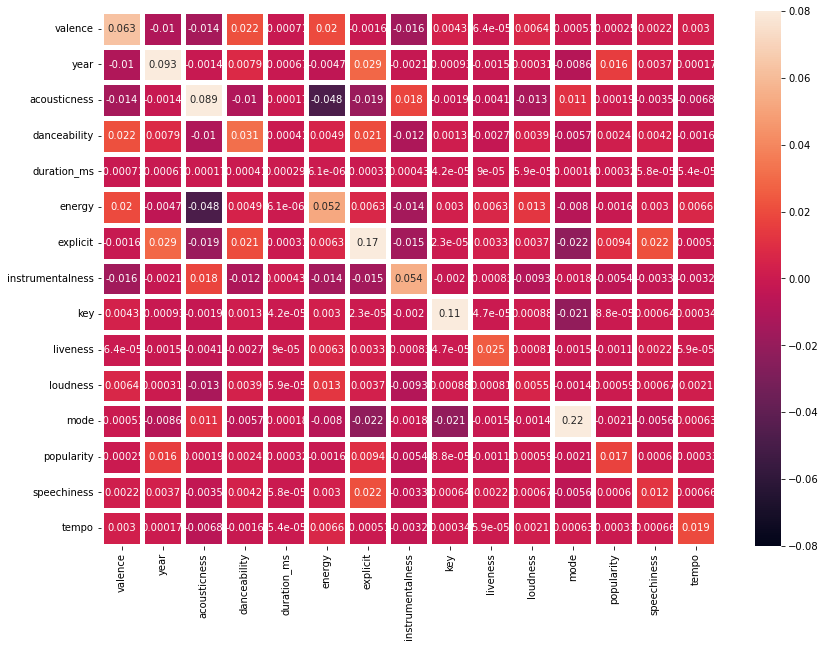

In [46]:
ax = sns.heatmap(music_norm.cov(),vmin=-0.08, vmax=0.08, annot = True, linewidths = 5, annot_kws={'size': 10})
fig = plt.gcf()
cm = 1/2.54
fig.set_size_inches(35*cm, 25*cm)
plt.show()

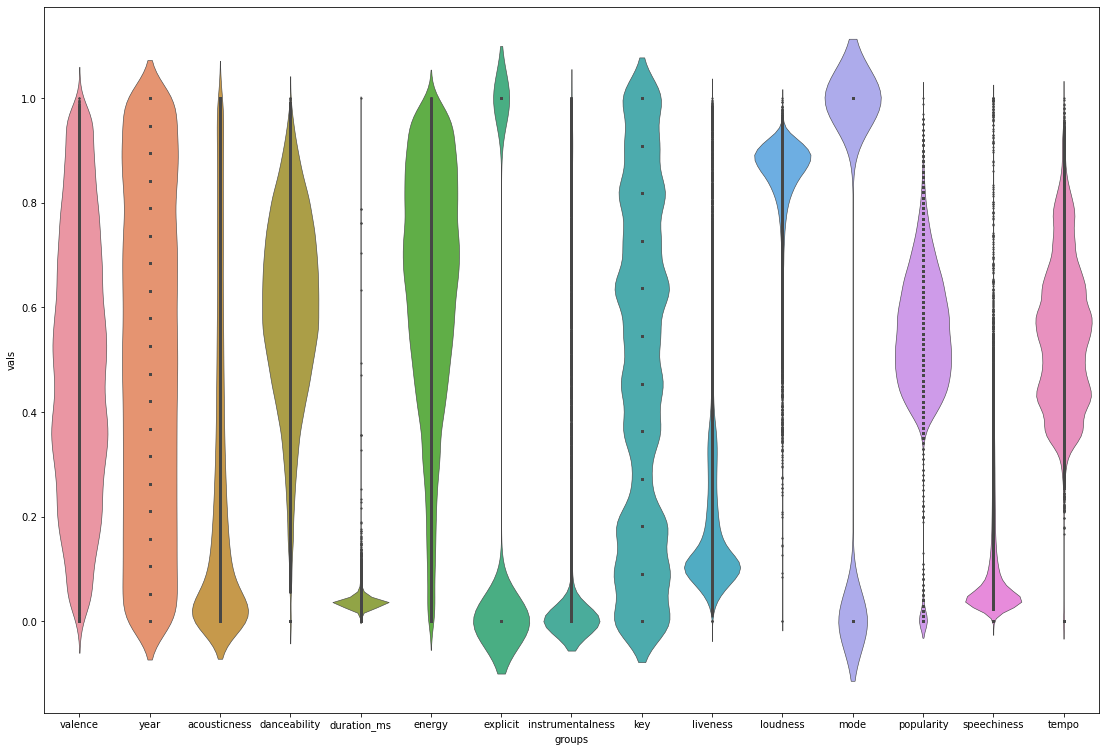

In [47]:
df2 = music_norm.melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=df2, linewidth = 0.6, inner = 'point', scale= 'width')
fig = plt.gcf()
cm = 1/2.54
fig.set_size_inches(48*cm, 33*cm)
plt.show()

In [48]:
mapping = pd.Series(music.index,index = music['name'])

In [49]:
mapping

name
The Middle                             0
Drops of Jupiter (Tell Me)             1
Last Resort                            2
Island In The Sun                      3
Chop Suey!                             4
                                   ...  
China                              39489
Halloweenie III: Seven Days        39490
AYA                                39491
Darkness                           39492
Billetes Azules (with J Balvin)    39493
Length: 39494, dtype: int64

In [50]:
X = music_norm[["popularity", "danceability", "energy", "loudness",
                "speechiness", "acousticness", "instrumentalness", "valence", "liveness"]].values

In [51]:
kmeans = KMeans(n_clusters=35)

# Treinando o modelo
kmeans.fit(X)

# Adicionando a coluna com o cluster ao DataFrame
music['cluster'] = kmeans.labels_


def recommend_music(music_name):
    # Encontrando a música na base de dados
    musica = music[music['name'] == music_name]
    
    # Se a música não foi encontrada, retorna uma mensagem de erro
    if musica.empty:
        return 'Music Not Found'
    
    # Selecionando os atributos da música
    music_attributes = musica[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'liveness']].values[0]
    
    # Previsão do cluster da música
    cluster = kmeans.predict([music_attributes])[0]
    
    # Recomendação de músicas do mesmo cluster
    recommended_music = music[music['cluster'] == cluster].head(10)[['name','artists']]
    
    return recommended_music

In [52]:
recommend_music('I Fall Apart') #Post Malone Music

,name,artists
1,Drops of Jupiter (Tell Me),['Train']
2,Last Resort,['Papa Roach']
3,Island In The Sun,['Weezer']
5,Clint Eastwood,['Gorillaz']
7,Your Body Is a Wonderland,['John Mayer']
9,Bodies,['Drowning Pool']
17,I Want It That Way,['Backstreet Boys']
27,U Got It Bad,['Usher']
29,U Remind Me,['Usher']
32,One More Time,['Daft Punk']
